<a href="https://colab.research.google.com/github/Eswa2020/moringa_school_projects/blob/master/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples

Let's figure out how to perform k-fold cross validation. For this, we will use the university acceptance dataset from Monday again. If you need to download it again, do so at this [link](https://drive.google.com/open?id=13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d)

We will first start by creating a multivariate model, and assessing it's accuracy.

In [3]:
#importing our libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
#load the data
data = pd.read_csv('/content/uni_admission (2).csv')

In [5]:
#We will use 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values


In [6]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
regressor.coef_


array([0.00544634, 0.00583592, 0.01426344, 0.03586462])

In [13]:
# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

In [14]:
#checking for the metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05691472219785115
Mean Squared Error: 0.005725926473228667
Root Mean Squared Error: 0.07566985181185878


Running the code above should yield an RMSE of ~ 0.0756. Let's now cross validate our model by using k-fold cross validation. We will use 5 folds for this example, and follow the documentation from [sklearn](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [66]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = KFold(n_splits=5)
folds



KFold(n_splits=5, random_state=None, shuffle=False)

In [67]:
# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

we are using 5 folds


In [70]:
# We now create and assess 5 models based on the folds we created.
RMSESs = [] # We will use this array to keep track of the RSME of each model
count2 = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count2))


Training model 1

Training model 1

Training model 1

Training model 1

Training model 1


In [71]:
# set up the train and test based on the split determined by KFold
# With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
  

In [72]:
# fit a model accordingly
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

In [80]:
rmse_valued =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSESs.append(rmse_valued)

In [81]:
print('Model ' + str(count2) + ' Root Mean Squared Error:',rmse_valued)
count2 = count2 + 1

Model 20 Root Mean Squared Error: 0.05995110606834264


In [ ]:
Model 1 Root Mean Squared Error: 0.05995110606834264


As you can tell from running the code, the RMSE value for our first model is fairly larger than the RMSE we found initially, and that of the other models. This would beg for an analysis of the specific indeces used. Perhaps most of the dataset's outliers were in the test set of model 1? as a challenge, perform a comparative analysis of the subset of the data used to test model 1 in comparison with the dataset as a whole.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [28]:
np.mean(RMSES)

0.05995110606834264

As you can see, the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 3 instead. 

Let's now highlight some variants of k-folds. A popular variant is called the leave one out cross validation, where the test data is just a single observation from your set. For a dataset of size **n**, this is the same as using kfold to create **n** folds. 


In [82]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 500 folds
trained 500 models


0.052094961294479325

In this scenario it is also helpful to plot out the RMSE values across all models:

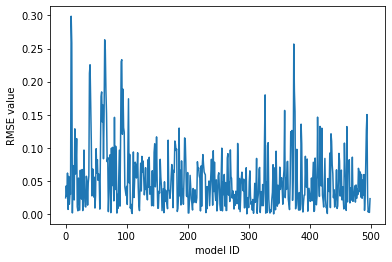

In [83]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

All in all, this indicates to us that it would be challenging to create a model that beats the ~0.05 average RMSE using this dataset. This is the benefit of using Leave One Out Cross validation: It gives us a sense of how best we can expect a given model to be using our dataset. Note however that this can be an extremely time consuming process for large datasets.

# Challenge 1

Revisit yesterday's challenge on wine quality, and use k-folds cross validation with 10 folds. Was your model good enough? Could you find a better performing model?

([Dataset link here](https://colab.research.google.com/drive/1IKt0hW3aWrKNwB0xxOQGjjWC8h3t_G8Q?authuser=1#scrollTo=-erZrimA8qNm))

In [29]:
#import our libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
#loading our dataset
wine= pd.read_csv('/content/winequality-red (1).csv')

In [31]:
#We will use 4 independent variables we reduced yesterday also
wine_x = wine[['fixed acidity','citric acid',
              'sulphates', 'alcohol']].values

wine_y= wine['quality'].values

In [34]:
#we use the folds above in code
#Let's now cross validate our model by using k-fold cross validation.
#We will use 10 folds for this one
from sklearn.model_selection import KFold
folds2 = KFold(n_splits=10)
folds2


KFold(n_splits=10, random_state=None, shuffle=False)

In [35]:
# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds2.get_n_splits(X)) + ' folds2')

we are using 10 folds2


In [38]:
# We now create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_indexw, test_indexw in folds2.split(wine_x):
  print('\nTraining model ' + str(count))


Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1

Training model 1


In [40]:
# set up the train and test based on the split determined by KFold
# With 10 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
wine_x_train, wine_x_test = wine_x[train_indexw], wine_x[test_indexw]
wine_y_train, wine_y_test = wine_y[train_indexw], wine_y[test_indexw]
  

In [41]:
# fit a model accordingly
regressor2 = LinearRegression()  
regressor2.fit(wine_x_train, wine_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# assess the accuraccy of the model
wine_y_pred = regressor2.predict(wine_x_test)
wine_y_pred

array([5.97711211, 5.18595945, 5.37368167, 5.88857712, 5.78387582,
       5.19750025, 5.37368167, 5.32227689, 5.32095509, 5.99681481,
       5.97711211, 5.96637783, 5.99467173, 5.08339038, 6.04741815,
       5.64479607, 5.42691758, 5.08339038, 5.66478431, 6.26952748,
       5.53306564, 5.30829728, 5.45259594, 5.55057396, 5.29916152,
       5.29916152, 5.4697881 , 5.66441793, 5.4697881 , 5.20980866,
       5.25517636, 6.18056941, 6.04974811, 5.62218488, 5.26831075,
       6.75079222, 5.26831075, 6.76233302, 5.35372021, 5.81300991,
       5.3398764 , 5.81300991, 5.5754975 , 5.74374172, 5.68002046,
       5.23282988, 5.48676196, 5.65296586, 5.76270349, 5.72851135,
       6.27684119, 5.76270349, 5.94839295, 5.31569671, 5.4096988 ,
       5.69928725, 5.31569671, 5.87450734, 5.58755065, 5.87450734,
       5.16359839, 5.1786637 , 5.27562821, 5.83128786, 5.95993986,
       5.32836245, 5.65753939, 5.95993986, 5.80741572, 5.93184167,
       5.39453834, 5.32566982, 5.49547438, 5.52508558, 5.21145

In [44]:
rmse_value =  np.sqrt(metrics.mean_squared_error(wine_y_test, wine_y_pred))
RMSES.append(rmse_value)

In [56]:
print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
count = count + 1

Model 12 Root Mean Squared Error: 0.729394553781638


In [ ]:
Model 2 Root Mean Squared Error: 0.729394553781638
Model 3 Root Mean Squared Error: 0.729394553781638
Model 4 Root Mean Squared Error: 0.729394553781638
Model 5 Root Mean Squared Error: 0.729394553781638
Model 6 Root Mean Squared Error: 0.729394553781638
Model 7 Root Mean Squared Error: 0.729394553781638
Model 8 Root Mean Squared Error: 0.729394553781638
Model 9 Root Mean Squared Error: 0.729394553781638
Model 10 Root Mean Squared Error: 0.729394553781638

In [ ]:
#countinues to model 12??/////??? and they have same value/.....weee(zimemix)....stresss

# Challenge 2
Another common variant of kfold is repeated kfold cross validation. This means that the folding and training processes get repeated several times, shuffling the dataset at each instance.

Read up n how to perform repeated kfold [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html#sklearn.model_selection.RepeatedKFold) 
 
Then, create a model to predict university admission again, this time using all independent varible, and krepeated kfold of your choice. Can you improve on the results without cross validation? Can you improve on the results from the Leave One Out cross validation?



In [ ]:
# YOUR CODE GOES HERE
